<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with improvements!
There are no critical issues left, so your project has been accepted.
Wish you cool projects in the next sprints! ☘️
    
PS: As a last thing, I can recommend cool lectures on stat analysis here: https://www.youtube.com/playlist?list=PL2SOU6wwxB0uwwH80KTQ6ht66KWxbzTIo  🙌

</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

**The purpose of this project is to analyze client's behavior and determine which prepaid plan brings in more revenue, is it Surf or Ultimate based on small client selection.
I will do so by firstly by loading the data, restore and clean it as necessary.
I might need to fill missing values with grouping data, check for duplicates and of course use statistics to solve the tasks and test the hypotheses.**

## Initialization

In [1]:
# Loading all the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import datetime
from functools import reduce
import seaborn as sns

## Load data

In [2]:
#loading data frames
try:
    calls = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    users = pd.read_csv('/datasets/megaline_users.csv')
except:
    print('Wrong file')


## Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
plans.head()# Print a sample of data for plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [5]:
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [6]:
plans.duplicated().sum()

0

In [7]:
plans.describe(include='object')

,plan_name
count,2
unique,2
top,surf
freq,1


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Looks realy good, there are no missing values or duplicates.**

## Fix data

## Enrich data

In [8]:
def plan_cal(plan_name):
    
    if plan_name == 'surf':
        return 1
    if plan_name == 'ultimate':
        return 0
plans['plan_cal'] = plans['plan_name'].apply(plan_cal)
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_cal
0,50,15360,500,20,10,0.03,0.03,surf,1
1,1000,30720,3000,70,7,0.01,0.01,ultimate,0


**adding a column to categorize the user's plan, whether it's surf or ultimate**

## Users

In [9]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [11]:
#looking for missing values
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [12]:
users.duplicated().sum()

0

In [13]:
users.describe(include='object')

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Grimes,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-03,surf,2018-12-18
freq,3,3,80,5,339,3


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Here we can see that there are no missing values except of 'churn_date' that needs further investigation. moreover we can see that in the unique row there are more first names than last names, maybe because people didn't fill it in.**

### Fix Data

In [14]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'].describe(datetime_is_numeric=True)
users['churn_date'] = users['churn_date'].fillna(value = '31/12/2040')
users['churn_date'] = pd.to_datetime(users['churn_date'])

count             34
unique            29
top       2018-12-18
freq               3
Name: churn_date, dtype: object

**filled 'churn_date' with 31/12/2018, because they stayed the whole year (if they want to leave, they will do it the year after). This column tells us when the user stopped using the service, and it might be missing because the calling plan was being used when this database was extracted.**

### Enrich Data

In [15]:
users['what_plan'] = users['plan'].apply(plan_cal)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,what_plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2040-12-31,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2040-12-31,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2040-12-31,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2040-12-31,1


## Calls

In [16]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [17]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [18]:
calls.describe(include='object')

,id,call_date
count,137735,137735
unique,137735,351
top,1492_36,2018-12-27
freq,1,1091


In [19]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [20]:
calls.duplicated().sum()

0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**everything looks good. call_date column appears to be an object, I will change it to datetime.**

### Fix data

In [21]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = [math.ceil(number) for number in calls['duration']]
calls['duration'] = calls['duration'].astype(int)
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


### Enrich data

## Messages

In [22]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [24]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [25]:
messages.duplicated().sum()

0

In [26]:
messages.describe(include='object')

,id,message_date
count,76051,76051
unique,76051,351
top,1224_168,2018-12-28
freq,1,702


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**The data looks good, 'message_date' should be datetime.**

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [27]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Internet

In [28]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [29]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [30]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [31]:
internet.duplicated().sum()

0

In [32]:
internet.describe(include='object')

,id,session_date
count,104825,104825
unique,104825,351
top,1453_109,2018-12-24
freq,1,851


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**The data looks good, session_date should be datetime. also I will add a column 'month' to ease the calculations later.**

### Fix data

In [33]:
mb_to_gb = 0.00097
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enrich data

In [34]:
internet['month'] = internet['session_date'].dt.month
surf_ids_mb = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
surf_ids_mb['gb_used'] = surf_ids_mb['mb_used'] * mb_to_gb
surf_ids_mb['gb_used'] = [math.ceil(number) for number in surf_ids_mb['gb_used']]
surf_ids_mb['gb_used'] = surf_ids_mb['gb_used'].astype(int)

internet.head()

internet.info()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


## Study plan conditions

In [35]:
# Print out the plan conditions and make sure they are clear for you
plans.describe(include='object')
plans.describe()
plans['usd_monthly_pay'].describe()
plans['usd_per_gb'].describe()


,plan_name
count,2
unique,2
top,surf
freq,1


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_cal
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,0.500000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142,0.707107
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000,0.000000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000,0.250000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000,0.500000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000,0.750000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000,1.000000


count     2.000000
mean     45.000000
std      35.355339
min      20.000000
25%      32.500000
50%      45.000000
75%      57.500000
max      70.000000
Name: usd_monthly_pay, dtype: float64

count     2.00000
mean      8.50000
std       2.12132
min       7.00000
25%       7.75000
50%       8.50000
75%       9.25000
max      10.00000
Name: usd_per_gb, dtype: float64

# calls by each user

In [36]:
# Calculate the number of calls made by each user per month. Save the result.
calls['month'] = pd.to_datetime(calls['call_date'])
month_calls = calls.groupby(['user_id', 'month']).month.count()
month_calls.head()

calls.info()

user_id  month     
1000     2018-12-26    2
         2018-12-27    5
         2018-12-28    4
         2018-12-29    1
         2018-12-30    1
Name: month, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 5.3+ MB


In [37]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls['month'] = calls['call_date'].dt.month

calls_sum = calls.pivot_table(index= ['user_id', 'month'], values = 'duration', aggfunc = ('sum', 'count')).reset_index()
calls_sum.head()


,user_id,month,count,sum
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


# messages by each user 

In [38]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.month
month_sent_messages = messages.groupby(['user_id', 'month']).message_date.count()# Calculate the number of messages sent by each user per month. Save the result.
month_sent_messages


user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: message_date, Length: 1806, dtype: int64

# internet traffic used by each user 

In [39]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
surf_ids_mb.head()

surf_ids_mb.tail()


mb_used  gb_used
user_id month                   
1000    12      1901.47        2
1001    8       6919.15        7
        9      13314.82       13
        10     22330.49       22
        11     18504.30       18

mb_used  gb_used
user_id month                   
1498    12     23137.69       23
1499    9      12984.76       13
        10     19492.43       19
        11     16813.83       17
        12     22059.21       22

# merging the data

In [40]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
dt = [calls_sum, month_sent_messages, surf_ids_mb]
merged_data = reduce(lambda left,right: pd.merge(left, right, on = ['user_id', 'month'],
                                                 how ='outer'), dt)

merged_data.rename(columns = {"message_date" : "messages"}, inplace = True)
dt1 = [merged_data, users]
merged_data = reduce(lambda left,right: pd.merge(left, right, on = ['user_id'],
                                                 how ='outer'), dt1)

merged_data = merged_data.fillna(value=0)
merged_data.head()


,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,what_plan
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2040-12-31,0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
2,1001,9.0,49.0,315.0,44.0,13314.82,13.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
4,1001,11.0,64.0,426.0,36.0,18504.30,18.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1


In [41]:
merged_data.head()

,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,city,reg_date,plan,churn_date,what_plan
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2040-12-31,0
1,1001,8.0,27.0,182.0,30.0,6919.15,7.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
2,1001,9.0,49.0,315.0,44.0,13314.82,13.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
3,1001,10.0,65.0,393.0,53.0,22330.49,22.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1
4,1001,11.0,64.0,426.0,36.0,18504.30,18.0,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2040-12-31,1


In [42]:
merged_data.duplicated().sum()

0

In [43]:
# Add the plan information
merged_data_new = merged_data.merge(plans,how='outer',left_on='what_plan',right_on='plan_cal')
merged_data_new.head()


,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,...,what_plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_cal
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,0,1000,30720,3000,70,7,0.01,0.01,ultimate,0
1,1006,11.0,2.0,10.0,15.0,2068.37,3.0,Jesusa,Bradford,73,...,0,1000,30720,3000,70,7,0.01,0.01,ultimate,0
2,1006,12.0,9.0,59.0,139.0,32118.82,32.0,Jesusa,Bradford,73,...,0,1000,30720,3000,70,7,0.01,0.01,ultimate,0
3,1008,10.0,71.0,476.0,21.0,17106.99,17.0,Emely,Hoffman,53,...,0,1000,30720,3000,70,7,0.01,0.01,ultimate,0
4,1008,11.0,63.0,446.0,37.0,23676.72,23.0,Emely,Hoffman,53,...,0,1000,30720,3000,70,7,0.01,0.01,ultimate,0


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [44]:
# Calculate the monthly revenue for each user
def revenue_total(x):
    revenue = x['usd_monthly_pay']
    if x['mb_used'] > x['mb_per_month_included']:
        payment = np.ceil(((x['mb_used'] - x['mb_per_month_included'])/1024))*x['usd_per_gb']
        revenue +=payment
    if x['sum'] > x['minutes_included']:
        payment = (x['sum'] - x['minutes_included'])*x['usd_per_minute']
        revenue +=payment
    if x['messages'] > x['messages_included']:
        payment = (x['messages'] - x['messages_included'])*x['usd_per_message']
        revenue +=payment
    return revenue
merged_data_new['users_revenue'] = merged_data_new.apply(revenue_total,axis=1)
merged_data_new.head()

,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_cal,users_revenue
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
1,1006,11.0,2.0,10.0,15.0,2068.37,3.0,Jesusa,Bradford,73,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
2,1006,12.0,9.0,59.0,139.0,32118.82,32.0,Jesusa,Bradford,73,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,84.0
3,1008,10.0,71.0,476.0,21.0,17106.99,17.0,Emely,Hoffman,53,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
4,1008,11.0,63.0,446.0,37.0,23676.72,23.0,Emely,Hoffman,53,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0


## Study user behaviour

### Calls

In [45]:
ultimate_users_plan = merged_data_new.query('plan == "ultimate"')
surf_users_plan = merged_data_new.query('plan == "surf"')

<AxesSubplot:xlabel='plan'>

Text(0.5, 1.0, 'plan lenght calls')

Text(0.5, 0, 'length')

Text(0, 0.5, 'count')

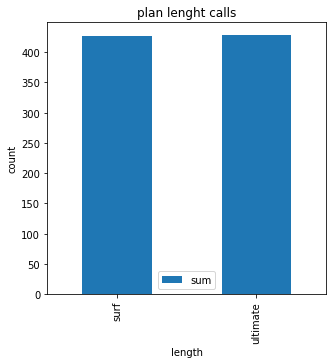

In [46]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
bar = merged_data_new.pivot_table(index='plan', values='sum', aggfunc='mean')
bar.plot(kind='bar', figsize=(5,5))
plt.title('plan lenght calls')
plt.xlabel('length')
plt.ylabel('count')
plt.show()


**The length= duration of the calls for the 2 plans. later you can see that I calsulated the mean and it's very close because of that the plots are similar.**

array([[<AxesSubplot:title={'center':'sum'}>]], dtype=object)

Text(0.5, 1.0, 'ultimate lenght calls')

Text(0.5, 0, 'duration')

Text(0, 0.5, 'calls')

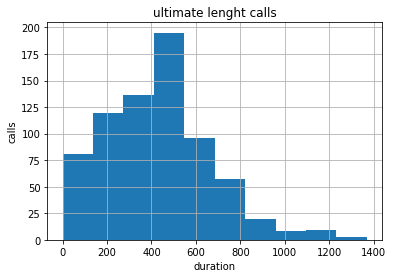

In [47]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
ultimate_users_plan.hist('sum')
plt.title('ultimate lenght calls')
plt.xlabel('duration')
plt.ylabel('calls')
plt.show()


array([[<AxesSubplot:title={'center':'sum'}>]], dtype=object)

Text(0.5, 1.0, 'surf lenght calls')

Text(0.5, 0, 'duration')

Text(0, 0.5, 'calls')

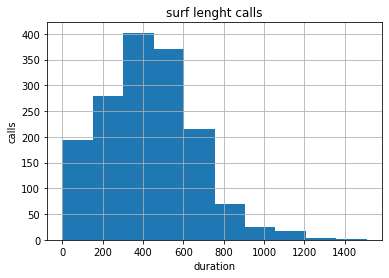

In [48]:
surf_users_plan.hist('sum')
plt.title('surf lenght calls')
plt.xlabel('duration')
plt.ylabel('calls')
plt.show()


**What we can learn from the 2  histograms that users in surf plan had more duration calls , and we can see a frequency of users who talked between 250 - 600 minutes.**

In [49]:
# Calculate the mean and the variance of the monthly call duration

#mean for each plan
ultimate_user_mean = ultimate_users_plan['sum'].mean()
surf_users_mean = surf_users_plan['sum'].mean()

#variance for each plan
ultimate_user_var = np.var(ultimate_users_plan['sum'])
surf_users_var = np.var(surf_users_plan['sum'])

ultimate_users_plan.pivot_table(index= 'plan', values= 'sum', aggfunc= ['mean', 'var','std', 'median'])
print('The mean of ultimate plan is:', ultimate_user_mean)
print('The variance of ultimate plan is:', ultimate_user_var)



surf_users_plan.pivot_table(index= 'plan', values= 'sum', aggfunc= ['mean', 'var','std', 'median'])
print('The mean of surf plan is:', surf_users_mean)
print('The variance of surf plan is:', surf_users_var)

,mean,var,std,median
,sum,sum,sum,sum
plan,,,,
ultimate,428.071823,58543.878652,241.958423,421.5


The mean of ultimate plan is: 428.0718232044199
The variance of ultimate plan is: 58463.016940874826


,mean,var,std,median
,sum,sum,sum,sum
plan,,,,
surf,427.120329,55455.5774,235.490079,424.0


The mean of surf plan is: 427.12032932235593
The variance of surf plan is: 55420.45670514804


**The ultimate plan has higher mean (pretty similar we can say), and a higher variance.**

<AxesSubplot:>

Text(0.5, 1.0, 'ultimate user duration')

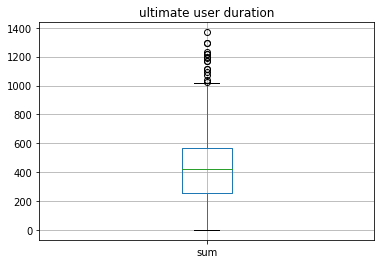

In [50]:
# Plot a boxplot to visualize the distribution of the monthly call duration
ultimate_users_plan.boxplot(['sum'])
plt.title('ultimate user duration')
plt.show()


<AxesSubplot:>

Text(0.5, 1.0, 'surf user duration')

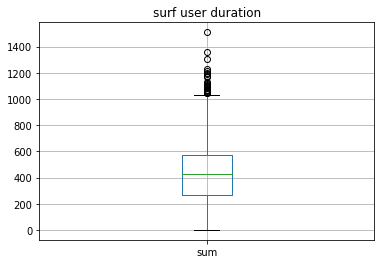

In [51]:
surf_users_plan.boxplot(['sum'])
plt.title('surf user duration')
plt.show()


**There are outliers in both boxplots, but the 2 boxplots are very similar.**

### Messages

array([[<AxesSubplot:title={'center':'messages'}>]], dtype=object)

Text(0.5, 1.0, 'ultimate messages')

Text(0.5, 0, 'messages')

Text(0, 0.5, 'count')

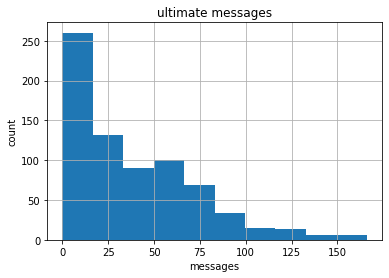

In [52]:
# Compare the number of messages users of each plan tend to send each month
#ultimate messages hist
ultimate_users_plan.hist('messages')
plt.title('ultimate messages')
plt.xlabel('messages')
plt.ylabel('count')
plt.show()


array([[<AxesSubplot:title={'center':'messages'}>]], dtype=object)

Text(0.5, 1.0, 'surf messages')

Text(0.5, 0, 'messages')

Text(0, 0.5, 'count')

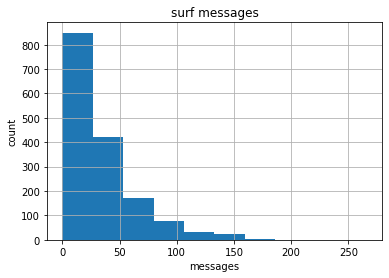

In [53]:
#surf messages hist
surf_users_plan.hist('messages')
plt.title('surf messages')
plt.xlabel('messages')
plt.ylabel('count')
plt.show()

**we can tell from the 2 histograms that the count and the number of messages in the surf hist is higher.**

# Internet 

array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

Text(0.5, 1.0, 'ultimate mb_used internet')

Text(0.5, 0, 'mb_used')

Text(0, 0.5, 'count')

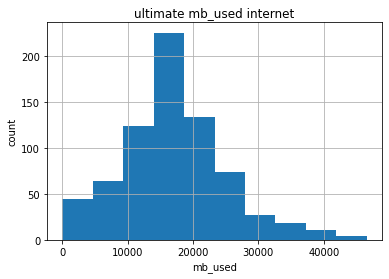

In [54]:
# Compare the amount of internet traffic consumed by users per plan
#ultimate internet
ultimate_users_plan.hist('mb_used')
plt.title('ultimate mb_used internet')
plt.xlabel('mb_used')
plt.ylabel('count')
plt.show()


array([[<AxesSubplot:title={'center':'mb_used'}>]], dtype=object)

Text(0.5, 1.0, 'surf mb_used internet')

Text(0.5, 0, 'mb_used')

Text(0, 0.5, 'count')

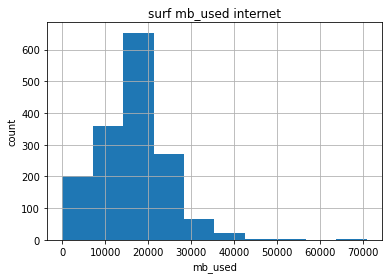

In [55]:
#surf mb_used internet
surf_users_plan.hist('mb_used')
plt.title('surf mb_used internet')
plt.xlabel('mb_used')
plt.ylabel('count')
plt.show()

**we can tell from the 2 histograms that the surf has a higher mb_used compared to ultimate, but it's a small difference.**

## Revenue

In [56]:
ultimate_users_rev = ultimate_users_plan['users_revenue'].mean()
surf_users_rev = surf_users_plan['users_revenue'].mean()


print(f'the mean revenue in ultimate plan is:{ultimate_users_rev}')
print()
print(f'the mean revenue in surf plan is:{surf_users_rev}')

the mean revenue in ultimate plan is:72.3011049723757

the mean revenue in surf plan is:60.551728942368584


**It seems that the surf plan users use more than the defult values of mg_used/messages/calls, because the plan's price is 20 and turned out the mean is 57.52.**

## Test statistical hypotheses

In [57]:
# Test the hypotheses
st.levene(ultimate_users_plan['users_revenue'], surf_users_plan['users_revenue'], center='mean')


LeveneResult(statistic=598.0794664776852, pvalue=1.3114884106236739e-117)

** for the first hypotheses: I decided that the null hypotheses is that both plans surf and ultimate have the same revenue, the alternative hypotheses was that both plans ultimate and surf have different revenues, which makes more sense.
the hypotheses test will be rejected if the p-value is smaller than the alpha(0.05) **

In [58]:
# Test the hypotheses
ultimate_revenue1 = ultimate_users_plan['users_revenue'].mean()
surf_revenue1 = surf_users_plan['users_revenue'].mean()
print('ultimate mean revenue is:', ultimate_revenue1)
print()
print('surf mean revenue is:', surf_revenue1)

ultimate mean revenue is: 72.3011049723757

surf mean revenue is: 60.551728942368584


In [59]:
alpha = 0.05
test = st.ttest_ind(ultimate_users_plan['users_revenue'], surf_users_plan['users_revenue'], equal_var=False)
print(f'the P-value is:{test.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\t reject the null hypotheses')

the P-value is:1.2184115852123163e-15
Reject the null hypotheses


**The hypotheses is that both plans give the same revenue, but this hypotheses got rejected since I defined alpha as 5% and that pvalue was lower than the alpha. so this event won't happen, as I showed before there is difference between the 2 revenues.**

** for the second hypotheses: I decided that the alternative hypotheses is that both areas NY-NJ and other regions have a different revenues and the null hypotheses is that both areas NY-NJ have the same revenues.
the hypotheses test will be rejected if the p-value is smaller than alpha (0.05) **

In [60]:
ny_nj_area = merged_data_new[merged_data_new['city'].str.contains("NY-NJ")]
ny_nj_area.head()

other_areas = merged_data_new[~merged_data_new['city'].str.contains("NY-NJ")]
other_areas.head()

,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_cal,users_revenue
30,1031,7.0,36.0,304.0,1.0,10653.04,11.0,Lane,Martin,52,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
31,1031,8.0,62.0,483.0,2.0,21615.94,21.0,Lane,Martin,52,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
32,1031,9.0,76.0,515.0,3.0,13005.92,13.0,Lane,Martin,52,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
33,1031,10.0,74.0,563.0,2.0,18775.73,19.0,Lane,Martin,52,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
34,1031,11.0,85.0,611.0,1.0,16198.94,16.0,Lane,Martin,52,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0


,user_id,month,count,sum,messages,mb_used,gb_used,first_name,last_name,age,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,plan_cal,users_revenue
0,1000,12.0,16.0,124.0,11.0,1901.47,2.0,Anamaria,Bauer,45,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
1,1006,11.0,2.0,10.0,15.0,2068.37,3.0,Jesusa,Bradford,73,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
2,1006,12.0,9.0,59.0,139.0,32118.82,32.0,Jesusa,Bradford,73,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,84.0
3,1008,10.0,71.0,476.0,21.0,17106.99,17.0,Emely,Hoffman,53,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0
4,1008,11.0,63.0,446.0,37.0,23676.72,23.0,Emely,Hoffman,53,...,1000,30720,3000,70,7,0.01,0.01,ultimate,0,70.0


In [61]:
ny_nj_area_mean = ny_nj_area['users_revenue'].mean()
other_areas_mean = other_areas['users_revenue'].mean()

print(f'The revenue of NY-NJ is: {ny_nj_area_mean}')
print(f'The revenue of other areas is: {other_areas_mean}')

The revenue of NY-NJ is: 59.948015873015876
The revenue of other areas is: 65.08926233766233


In [62]:
st.levene(ny_nj_area['users_revenue'], other_areas['users_revenue'], center='mean')

LeveneResult(statistic=1.738693217132742, pvalue=0.18743571504599707)

In [63]:

test_areas = st.ttest_ind(ny_nj_area['users_revenue'], other_areas['users_revenue'], equal_var=False)
print(f'the P-value is:{test_areas.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\t reject the null hypotheses')

the P-value is:0.03870322661292962
Reject the null hypotheses


**The hypotheses is that NY-NJ and other areas have the same revenue, but this hypotheses got rejected since I defined alpha as 5% and that pvalue was lower than the alpha. so this event won't happen, as I showed before there is difference between the 2 revenues.**

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

**The purpose of this project was to analyze client's behavior and determine which prepaid plan brings in more revenue, is it Surf or Ultimate. First I studied the columns - internet, calls, messages.. and had to fix some issues in case there was missing data, and also added columns so it would be easier for me to do the calculations. 
From the calculations the both plans have different revenues, as I mentioned before the users of surf plan use more than the defult values of mg_used/messages/calls, because the plan's price is 20 and turned out the mean is 57.52. And for NY-NJ compared to other areas there was differene between the revenues. **
after plotting some charts and histograms to have a better look on the data I concluded that there is a bigger revenue from the ultimate plan than the surf while the mean revenue of from ultimate plan is around 72 and from surf plan is around 60. the same for the two different areas were checked : NY-NJ area and other regions while the revenue is higher in other regions area users.
there are some users that exceed their plan limits and its recommended for them to take the ultimate plan, big part of them will not exceed the plan if they take with larger number of messages, GB and minutes. even if they exceed will cost them lower than now.**

<div class="alert alert-success" role="alert">
<b>Reviewer's comment v2:</b>
    
- You conducted an outstanding research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusion. It is very structured and provides insights and recommendations to the business.